<a href="https://colab.research.google.com/github/gnocchiarsugo/MLPNS/blob/main/midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [331]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.cluster  import KMeans
import scipy.optimize
from scipy.optimize import minimize



In [332]:
datain = pd.read_csv('https://raw.githubusercontent.com/fedhere/MLPNS2021/main/midterm/country_pop.csv')

print("there are {} countries and {} time stamps in the data".
      format(*datain.shape))
datain = pd.read_csv('https://raw.githubusercontent.com/fedhere/MLPNS2021/main/midterm/country_pop_clean.csv')
print("there are {} countries and {} time stamps in the cleaned data".
      format(*datain.shape))

there are 264 countries and 62 time stamps in the data
there are 258 countries and 61 time stamps in the cleaned data


In [345]:
# Rescale values
X = datain.values
for i in range(61):
  X[i][1:] = (X[i][1:] - np.mean(X[i][1:])) / np.std(X[i][1:])

print(X)

[['Aruba' -1.1548793385173401 -1.0906368639532462 ... 1.523461155636061
  1.5485403286728998 1.5730959281599088]
 ['Afghanistan' -1.084548540876526 -1.064579443041651 ...
  2.0768665185308475 2.1783102349953003 2.2789875527780827]
 ['Angola' -1.0802656255204373 -1.0703851838794147 ... 2.0646081169753816
  2.192796581362405 2.3238920299707293]
 ...
 ['South Africa' 17099840.0 17524533.0 ... 57000451.0 57779622.0
  58558270.0]
 ['Zambia' 3070776.0 3164329.0 ... 16853688.0 17351822.0 17861030.0]
 ['Zimbabwe' 3776681.0 3905034.0 ... 14236745.0 14439018.0 14645468.0]]


Text(0, 0.5, 'Popolazione standardizzata')

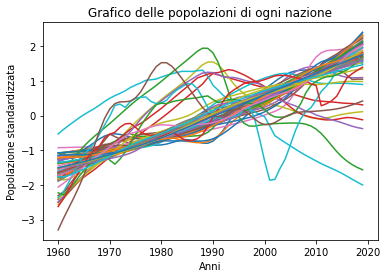

In [346]:
 #replot
x = np.arange(1960,2020)

for i in range(61):
  pl.plot(x, X[i][1:])

pl.title('Grafico delle popolazioni di ogni nazione')
pl.xlabel('Anni')
pl.ylabel('Popolazione standardizzata')


In [336]:
def parabola(x, a, b, c):
    return a*x**2 + b*x + c
def l2(args,x,y):
  a,b,c = args
  return sum((y - parabola(x,a,b,c))**2)

In [337]:
features = np.zeros((len(X),3))
x = np.arange(1960,2020)

for i in range(len(X)):
  y = X[i][1:]
  initialGuess = ( 1, 1, 1)
  l2Solution = minimize(l2, initialGuess, args=(x, y))
  features[i] = l2Solution.x



/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1058: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


In [338]:
# ks test contro la normale
alpha = 0.05

pvalues= np.zeros((len(X),1))
for i in range(len(X)):
  e = scipy.stats.kstest(X[i][1:].astype(float),'norm')
  pvalues[i] = e.pvalue

countries = []
for i in range(len(X)):
  countries.append(X[i][0])

broadcasting = pvalues>alpha



In [339]:
#dal precedente si deduce che in alcune nazioni non si può rigettare l'ipotesi nulla
#mentre nella maggior parte ciò è possibile

#l'ipotesi nulla è che la il dato della popolazione in un anno sia estratto da una
#distribuzione normale


varMeans = []
varFeatures = []
for i in range(len(X)):
  varMeans.append(np.mean(features[i][:])) 

for i in range(len(X)):
  varFeatures.append(np.std(features[i][:])) 


#rescaling features
for i in range(len(X)):
  features[i][:] = (features[i][:] - np.mean(features[i][:]) ) / np.std(features[i][:])

Text(0, 0.5, 'Varianza')

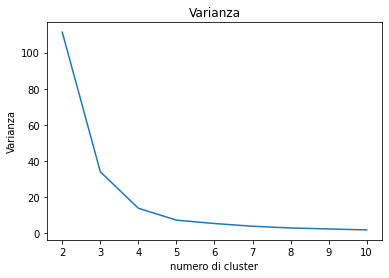

In [348]:
nc = np.arange(2,11)
var = []
for i in range(len(nc)):
  c = KMeans(n_clusters=nc[i]).fit(features)
  var.append(c.inertia_)
np.array(var)
pl.plot(nc,var)
pl.title('Varianza')
pl.xlabel('Numero di cluster')
pl.ylabel('Varianza')


In [341]:
#dal precedente si vede che è meglio 3 o 4 cluster
c = KMeans(n_clusters=4).fit(features)
print(c.cluster_centers_)

[[-0.64304749 -0.76232922  1.40537671]
 [ 0.75459737  0.64419834 -1.39879571]
 [ 0.74549568 -1.39203396  0.64653828]
 [-0.78153145  1.39664644 -0.61511499]]


In [342]:
#il precedente sono in righe i cluster, mentre le colonne sono a,b e c
#quindi abbiamo raggruppato diverse nazioni sotto categorie di 
#crescita della popolazione grazie ad un'interpolazione parabolica
#della stessa

[[ -17728.86771121  -19296.39120275    9190.20131556]
 [    859.57872141   -1094.62516091  -37258.22856859]
 [   2658.4085914  -141367.24339584   -4009.29040833]
 [  -1824.54833757   50822.58241165    2197.78125173]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

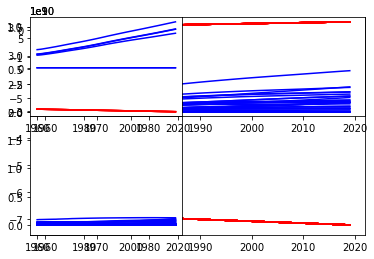

In [343]:
labels = c.labels_

unStdCenters = np.zeros((4,3)) 
for i in range(4): 
  unStdCenters[i][:] = c.cluster_centers_[i]*varFeatures[i] + varMeans[i]

print(unStdCenters)
x = np.arange(1960,2020)

ind = np.arange(0,len(labels))

ind0 = ind[labels == 0] 
ind1 = ind[labels == 1] 
ind2 = ind[labels == 2] 
ind3 = ind[labels == 3] 
fig = pl.figure();

for i in range(len(ind0)): 
  plt1 = fig.add_subplot(1,1,1) 
  plt1.plot(x,X[ind0[i]][1:],'b') 
  plt1.plot(x,parabola(x,unStdCenters[0][0],unStdCenters[0][1],unStdCenters[0][2]),'r')

for i in range(len(ind1)): 
  plt2 = fig.add_subplot(1,2,1) 
  plt2.plot(x,X[ind1[i]][1:],'b') 
  plt2.plot(x,parabola(x,unStdCenters[1][0],unStdCenters[1][1],unStdCenters[1][2]),'r')

for i in range(len(ind2)): 
  plt3 = fig.add_subplot(2,1,1) 
  plt3.plot(x,X[ind2[i]][1:],'b') 
  plt3.plot(x,parabola(x,unStdCenters[2][0],unStdCenters[2][1],unStdCenters[2][2]),'r')

for i in range(len(ind3)): 
  plt4 = fig.add_subplot(2,2,1) 
  plt4.plot(x,X[ind3[i]][1:],'b') 
  plt4.plot(x,parabola(x,unStdCenters[3][0],unStdCenters[3][1],unStdCenters[3][2]),'r')

In [344]:
#le righe blu sono i dati mentre le righe rosse sono i fit parabolici


#chiaramente non torna

In [349]:
unStdCenters[1][:]

array([   859.57872141,  -1094.62516091, -37258.22856859])